In [55]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

In [3]:
os.chdir('C:\\Users\\VGopalak\\Desktop\\ML\\un-supervised learning')

**Data Exploration.**

In [4]:
df=pd.read_excel('Part2 - Company.xlsx')

In [6]:
df.head()

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

- **We can see null value exists in quality column.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [8]:
df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

- **We have 18 missing values. These are the values we need to predict.**

In [9]:
df.describe()

A           B           C           D
count   61.000000   61.000000   61.000000   61.000000
mean   118.557377  116.639344  114.081967  114.459016
std     61.771494   57.897908   65.615368   63.144431
min      3.000000    5.000000    3.000000    3.000000
25%     61.000000   63.000000   59.000000   51.000000
50%    136.000000  138.000000  135.000000  132.000000
75%    171.000000  168.000000  174.000000  174.000000
max    200.000000  200.000000  200.000000  199.000000

- **All columns has more or less similar values. In all cases mean is less than median. We will visulaize and see the distributions.**

# Data analysis & visualisation: 

# **Uni/BI/Multi-Variate Analysis**

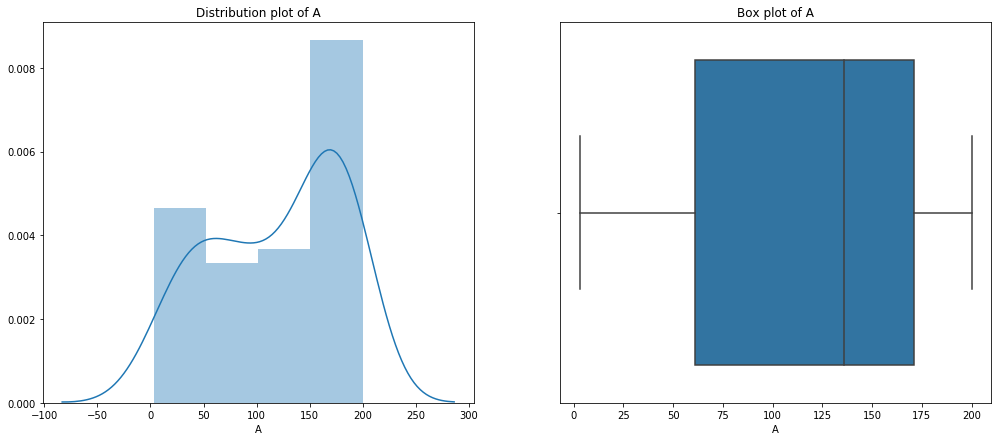

 Total Number of outliers in A: 0


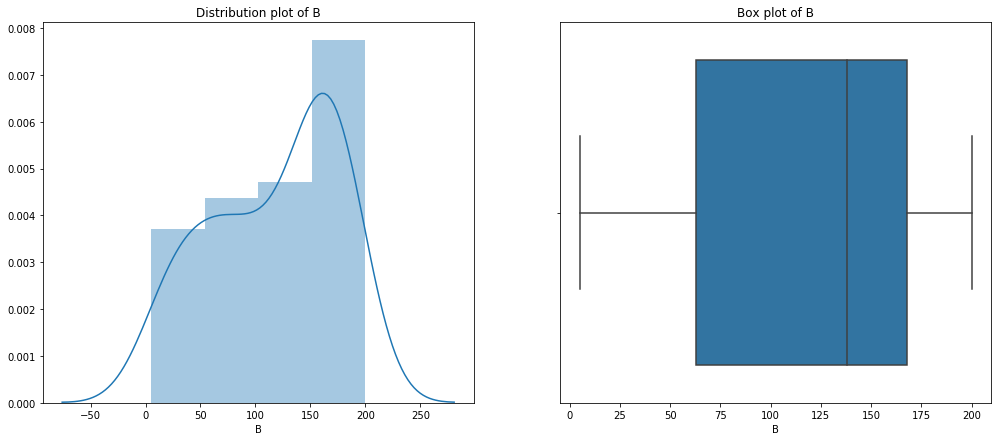

 Total Number of outliers in B: 0


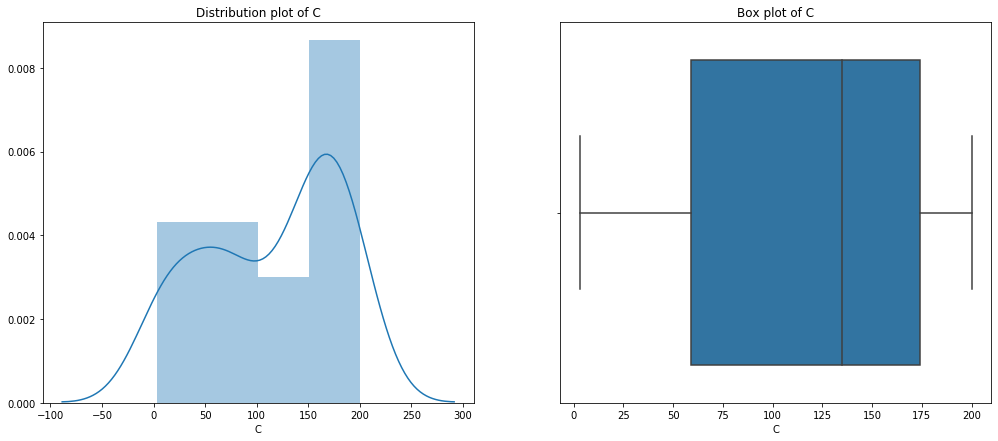

 Total Number of outliers in C: 0


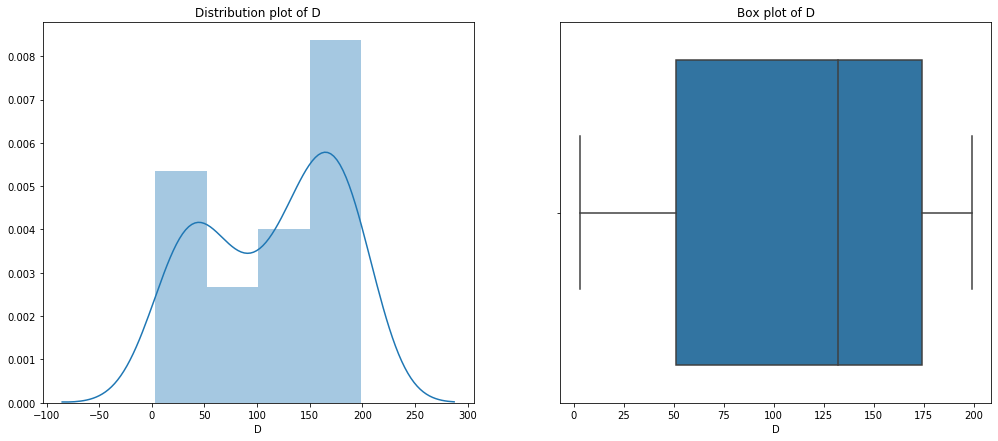

 Total Number of outliers in D: 0


In [10]:
for i in df.select_dtypes(include=['int64']).columns:
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = i, data=df,  orient='h' , ax=axes[1])
    #sns.set(axis_bgcolor='k')
    sns.distplot(df[i],  ax=axes[0])
    axes[0].set_title('Distribution plot of {}'.format(i))
    axes[1].set_title('Box plot of {}'.format(i))
    plt.show()
    #checking count of outliers.
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i < lower or i > upper]
    print('{} Total Number of outliers in {}: {}'.format('\033[1m',i,len(Outliers)))

- **There is no outliers in each column**


- **We can see two distributions in the data.**


**Pair Plot**

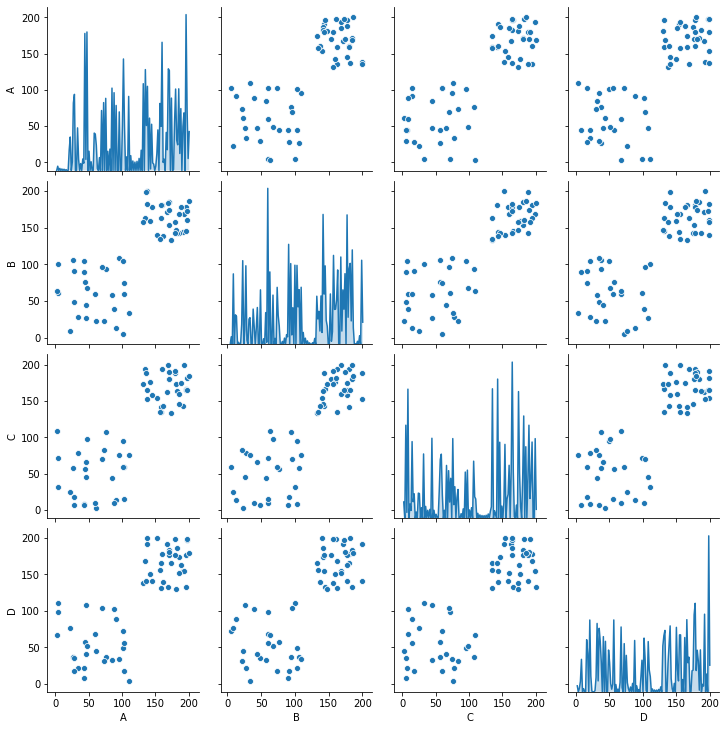

In [11]:
sns.pairplot(df,diag_kind='kde',diag_kws={'bw': 0.2})

- **We can clearly see there are two distributions in data.**


- **We will use clustering method to predict missing value.**

**Correlation Plot**

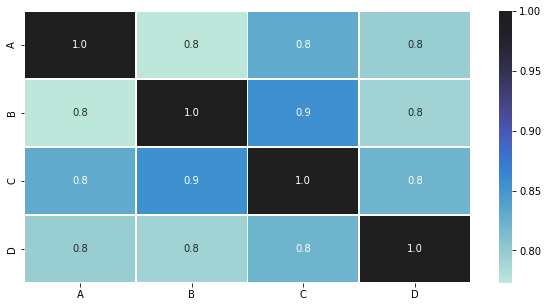

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

- **We can see all variables are correlated to each other**


- **Minimum correlation is 80%**

In [13]:
df_1=df.copy() #making copy of dataframe

**Scaling Numerical Variables**

In [14]:
li=list(df.select_dtypes(include=['int64','float64']).columns)
print(li)

['A', 'B', 'C', 'D']


In [15]:
df_1[li]=df_1[li].apply(zscore) #replacing each continuos values with z-score value

- **Since clustering is based on distance measure, changing values to single scale will yield better predictions.**

# K- Means Clustering

In [16]:
df_1.columns

Index(['A', 'B', 'C', 'D', 'Quality'], dtype='object')

In [17]:
X=df_1.drop('Quality',axis=1)

In [18]:
Model=KMeans(2,random_state=1)
Model.fit(X)
prediction=Model.predict(X)

#Append the prediction 
df["GROUP"] = prediction
df_1["GROUP"] = prediction


- **We will compare actual column vs predicted column.**

In [19]:
df_Clust = df.groupby(['GROUP'])
df_Clust.mean() #taking  mean for each cluster

A           B           C           D
GROUP                                               
0       58.75000   60.928571   49.750000   53.000000
1      169.30303  163.909091  168.666667  166.606061

In [20]:
df_Clust = df.groupby(['Quality'])
df_Clust.mean() #taking  mean for each cluster

A           B           C           D  GROUP
Quality                                                         
Quality A   58.769231   62.230769   53.000000   51.807692      0
Quality B  167.176471  168.470588  173.470588  165.411765      1

- **Mean values of Quality A and cluster 0 are nearly equal**


- **Mean values of Quality B and cluster 1 are nearly equal**

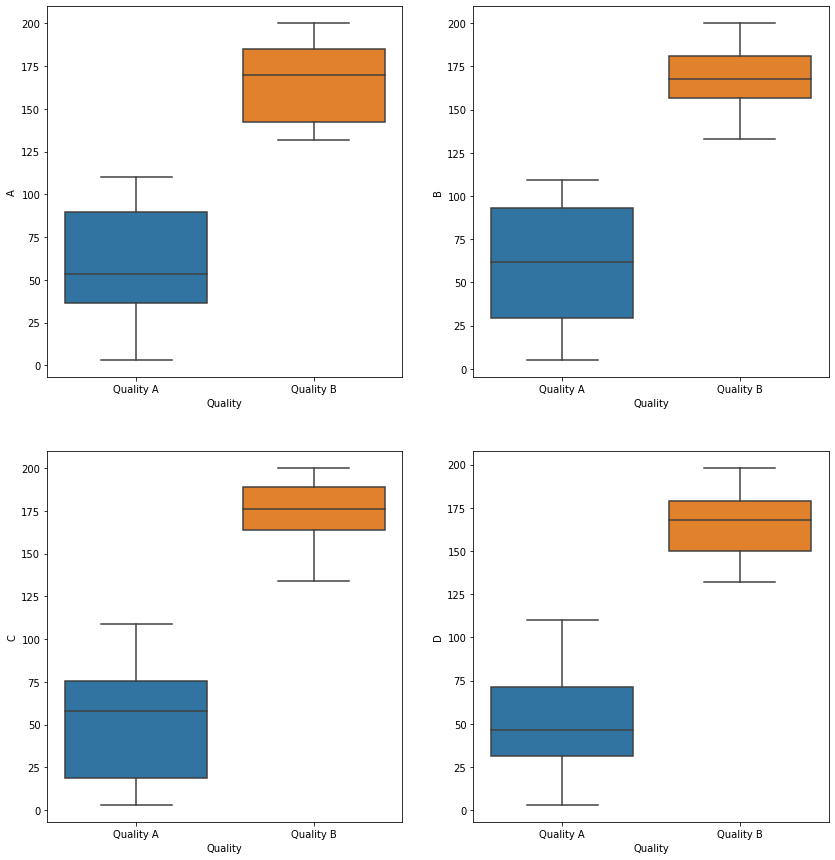

In [22]:
f, axes = plt.subplots(2, 2, figsize=(14,15))
sns.boxplot(x='Quality',y='A',data=df,ax=axes[0][0])
sns.boxplot(x='Quality',y='B',data=df,ax=axes[0][1])
sns.boxplot(x='Quality',y='C',data=df,ax=axes[1][0])
sns.boxplot(x='Quality',y='D',data=df,ax=axes[1][1])
plt.show()

- **Quality B chemical composition is higher for all variables.**


- **Similarly Quality A has less chemical copositions.**

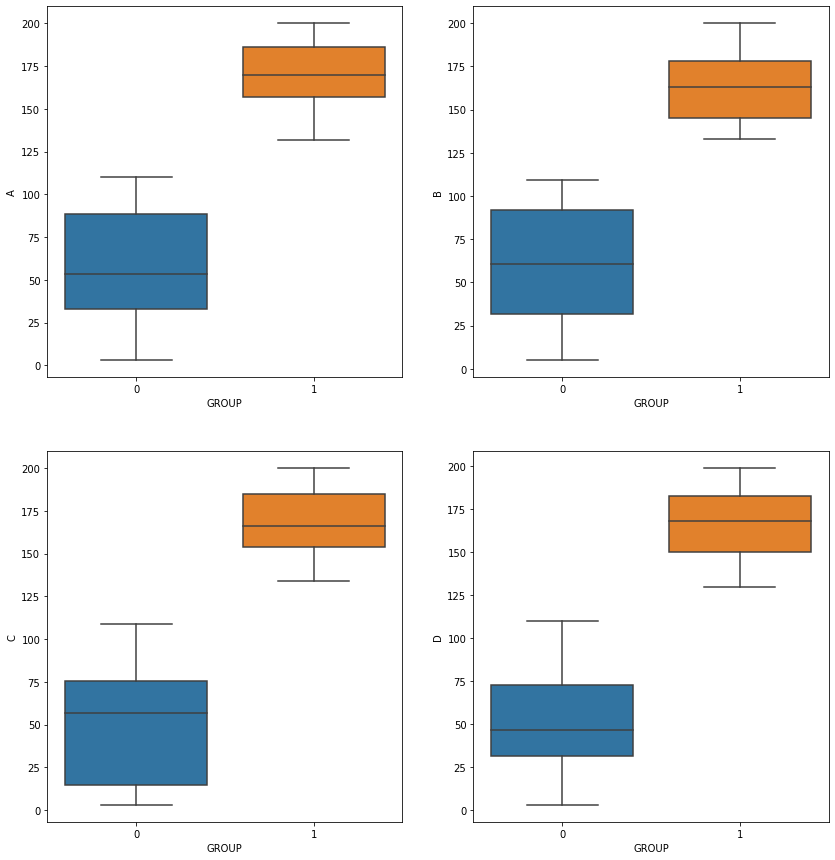

In [21]:
f, axes = plt.subplots(2, 2, figsize=(14,15))
sns.boxplot(x='GROUP',y='A',data=df,ax=axes[0][0])
sns.boxplot(x='GROUP',y='B',data=df,ax=axes[0][1])
sns.boxplot(x='GROUP',y='C',data=df,ax=axes[1][0])
sns.boxplot(x='GROUP',y='D',data=df,ax=axes[1][1])
plt.show()

- **We can see distribution of cluster 0 is similar to Quality A and Cluster 1 is similar to Quality B**

# Statistical Test

- **We can statistically check whether predicted target and actual target are significant to each other.**

In [23]:
pd.crosstab(df[df['Quality'].isnull()==False]['Quality'],df[df['Quality'].isnull()==False]['GROUP'])

GROUP       0   1
Quality          
Quality A  26   0
Quality B   0  17

- **It is evident that quality A belongs to cluster 0 and Quality B belongs to cluster 1**

- **Since both are categorical we will do chi-square test.**

In [24]:
import pandas as pd
import scipy.stats as stats 
crosstab=pd.crosstab(df[df['Quality'].isnull()==False]['Quality'],df[df['Quality'].isnull()==False]['GROUP'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 4.4187671236335195e-10


In [25]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Actual and Predicted are significant')
else:
    print('Fail to Reject Null Hypothesis.Actual and Predicted are not significant')

Rejecting Null Hypothesis.Actual and Predicted are significant


- **We have statistically proved that actual and predicted are significant.**

- **We will use predicted column as target column and we will replace 0 as Quality A and 1 as Quality B**

In [26]:
df['GROUP'].replace({0:'Quality A',1:'Quality B'},inplace=True)

In [27]:
df.head()

A    B    C    D    Quality      GROUP
0   47   27   45  108  Quality A  Quality A
1  174  133  134  166  Quality B  Quality B
2  159  163  135  131        NaN  Quality B
3   61   23    3   44  Quality A  Quality A
4   59   60    9   68  Quality A  Quality A

- **Here Group column is our new target.**

In [28]:
df['GROUP'].isnull().sum()

0

- **Now updated target column will not have any missing value.**

# All missing values are imputed using K-Means.

# KNN Imputer

**Now we will see how to impute missing value with KNN imputer.**

In [57]:
df_2=df.copy() #taking copy of original dataframe.

In [58]:
df_2['Quality'].replace({'Quality A':0,'Quality B':1},inplace=True) #Replacing quality A as 0 and Quality B as 1.
df_2=df_2.drop('GROUP',axis=1)

In [43]:
df_2['Quality'].isnull().sum()

18

**As already seen above quality column has 18 NAN values.**

In [30]:
imputer = KNNImputer(n_neighbors=2)

**We are building KNN model with neighbors as 2.**

In [59]:
df_knn=pd.DataFrame((imputer.fit_transform(df_2)),columns = df_2.columns)

In [61]:
df_knn.head()

A      B      C      D  Quality
0   47.0   27.0   45.0  108.0      0.0
1  174.0  133.0  134.0  166.0      1.0
2  159.0  163.0  135.0  131.0      1.0
3   61.0   23.0    3.0   44.0      0.0
4   59.0   60.0    9.0   68.0      0.0

In [60]:
df_knn.isnull().sum()

A          0
B          0
C          0
D          0
Quality    0
dtype: int64

# **All  missing values are imputed using KNN**

# we have created two synthetic data generation model to impute missing records.